# Business Understanding

## Project Domain

> Domain: Artificial Intelligence & Medical Diagnosis

> Sub-Domain: Anaemia Detection & Hematological Analysis

Sistem prediksi anemia *(Anaemia Prediction System)* termasuk dalam bidang kecerdasan buatan yang memanfaatkan pembelajaran mesin untuk mengidentifikasi kondisi anemia pada individu. Dataset ini dirancang untuk mengembangkan dan menguji model pembelajaran mesin yang dapat memprediksi anemia berdasarkan fitur-fitur seperti kadar hemoglobin, jenis kelamin, dan distribusi warna piksel dalam gambar. Model semacam ini berguna dalam berbagai aplikasi, seperti skrining kesehatan masyarakat, diagnosis awal anemia, dan sistem pendukung keputusan medis.

## Problem Statements

Masalah yang Dihadapi:

1. Tingginya Risiko Keterlambatan Diagnosis Anemia

  * Banyak individu tidak menyadari bahwa mereka mengalami anemia hingga muncul gejala yang parah.

  * Ketergantungan pada tes laboratorium yang membutuhkan waktu dan biaya dapat menunda penanganan medis.

2. Kurangnya Sistem Prediksi Otomatis yang Efektif

  * Belum tersedia sistem berbasis machine learning yang andal untuk memprediksi kondisi anemia secara cepat dan akurat menggunakan data kesehatan dasar.

  * Hal ini menyulitkan skrining cepat dalam konteks layanan kesehatan primer atau masyarakat luas.

3. Ketidakteraturan dalam Interpretasi Data Kesehatan

  * Data medis seperti kadar hemoglobin, jenis kelamin, dan fitur citra (jika ada) sering kali diinterpretasikan secara subjektif.

  * Hal ini dapat menyebabkan inkonsistensi dalam diagnosis anemia, terutama tanpa dukungan teknologi berbasis data.



## Goals

  * Membangun sistem prediksi berbasis AI (Artificial Neural Network) yang dapat mengidentifikasi dan mengklasifikasikan kondisi anemia secara otomatis berdasarkan data karakteristik individu, seperti kadar hemoglobin, jenis kelamin, serta atribut lain dalam dataset Anaemia Prediction.

  * Model ini dilatih untuk mengenali pola-pola dari data klinis yang berhubungan dengan anemia, sehingga memungkinkan sistem memprediksi kondisi anemia dengan akurat tanpa memerlukan interpretasi manual atau aturan medis eksplisit.

## Solution Statements

  * Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk melakukan klasifikasi kondisi anemia berdasarkan data seperti kadar hemoglobin, jenis kelamin, dan parameter kesehatan lainnya.
Model dilatih untuk memprediksi status anemia dengan akurasi tinggi (>90%).

* Aplikasi Web (Streamlit)
Membuat antarmuka pengguna yang intuitif untuk input data pasien secara manual atau batch (CSV), dan memberikan hasil prediksi kondisi anemia secara instan.

* Optimasi dengan TensorFlow Lite
Model dikonversi ke format TFLite agar dapat dijalankan di perangkat mobile atau sistem kesehatan lapangan dengan sumber daya terbatas, mendukung diagnosis cepat di daerah terpencil.

# Data Understanding

In [2]:
# prepping
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Import Library yang Dibutuhkan

In [19]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# file = "/content/d_output.csv"
df = pd.read_csv('/content/d_output.csv')
df.sample(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
340,341,F,44.897501,30.452158,24.722756,11.728694,No
459,460,F,44.117663,29.607689,26.295587,12.479346,No
254,255,F,44.334795,30.382842,25.420210,8.022105,Yes
255,256,F,43.029723,29.387274,27.416860,9.876261,Yes
380,381,F,45.385842,29.411266,25.117372,12.155626,No


## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


# Data Preparation

## 1. Hapus Kolom "Number"

In [8]:
df.drop(columns=['Number'], inplace=True)
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.170845,30.945626,25.921971,6.252659,Yes
1,F,43.163481,30.306974,26.759843,8.578865,Yes
2,F,46.269997,27.315656,26.028556,9.640936,Yes
3,F,45.054787,30.469816,24.460797,4.794217,Yes
4,M,45.061884,31.218572,24.071714,8.865329,Yes
...,...,...,...,...,...,...
495,F,45.749211,27.630846,26.865636,13.760084,No
496,F,44.929398,30.271085,24.501944,11.588917,No
497,F,43.452565,29.784122,26.764283,12.460060,No
498,F,43.224231,29.742489,26.866944,12.074058,No


## 2. Pisahkan Fitur dan Target

In [10]:
# pisahkan fitur dan target
X = df.drop(columns=["Anaemic"])
y = df["Anaemic"]

In [13]:
# Ubah Sex category ke numerik
X['Sex'] = X['Sex'].map({'F': 0, 'F ': 0, 'M': 1, 'M ':1})

## 3. Encode Label Target

In [16]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## 4. Normalisasi Fitur

In [17]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## 5. Splitting to Train and Test Set

In [18]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [20]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

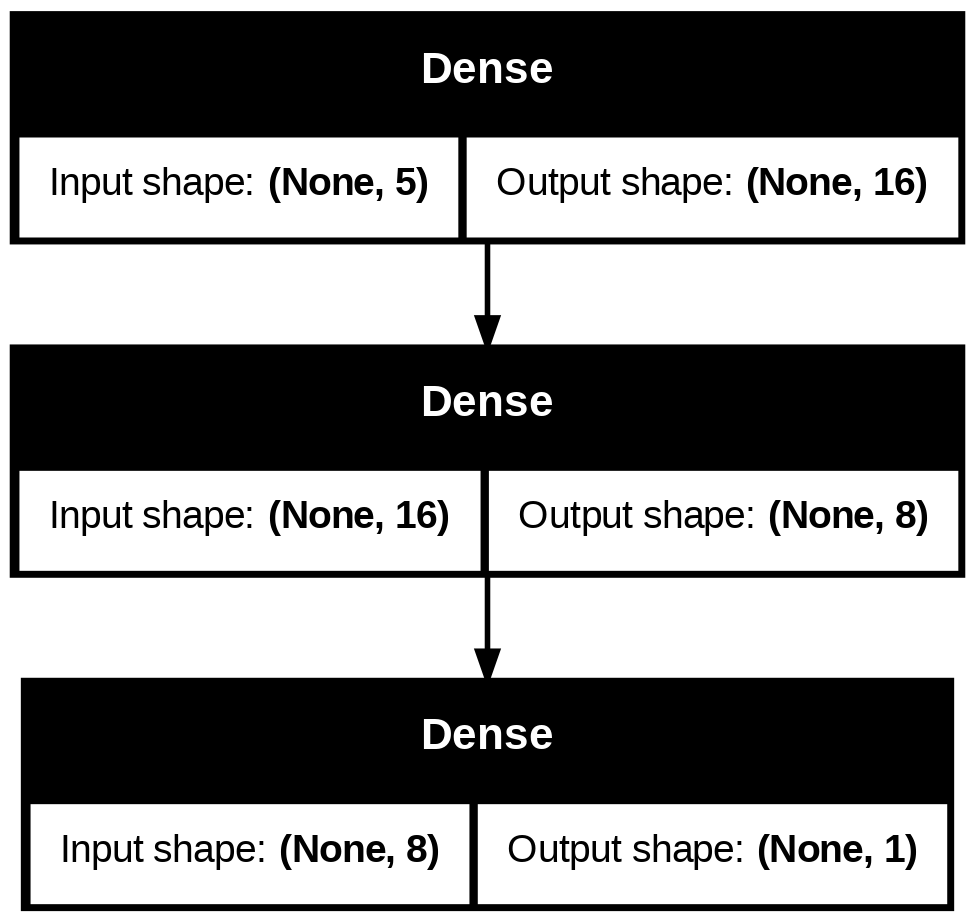

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [24]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5589 - loss: 0.7042 - val_accuracy: 0.3700 - val_loss: 0.7203
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5473 - loss: 0.6964 - val_accuracy: 0.3700 - val_loss: 0.7062
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 0.6862 - val_accuracy: 0.4000 - val_loss: 0.6969
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5978 - loss: 0.6746 - val_accuracy: 0.4600 - val_loss: 0.6897
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6323 - loss: 0.6618 - val_accuracy: 0.5500 - val_loss: 0.6805
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7241 - loss: 0.6435 - val_accuracy: 0.6500 - val_loss: 0.6622
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7730 - loss: 0.6135 - val_accuracy: 0.6500 - val_loss: 0.6471
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.5749 - val_accuracy: 0.6500 - val_loss:

# Evaluation

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9724 - loss: 0.0588 
Akurasi Model: 0.9700
Loss Model: 0.0607


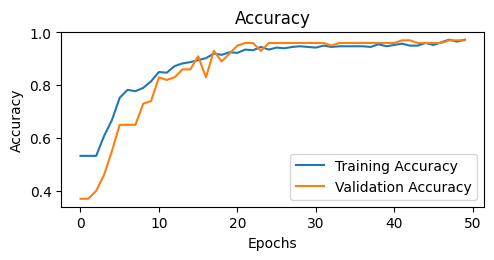

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

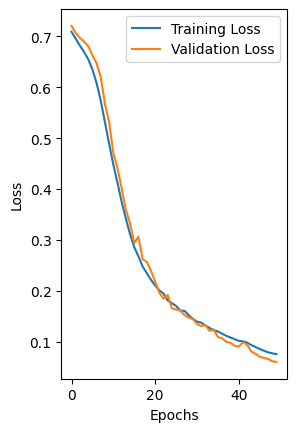

In [27]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


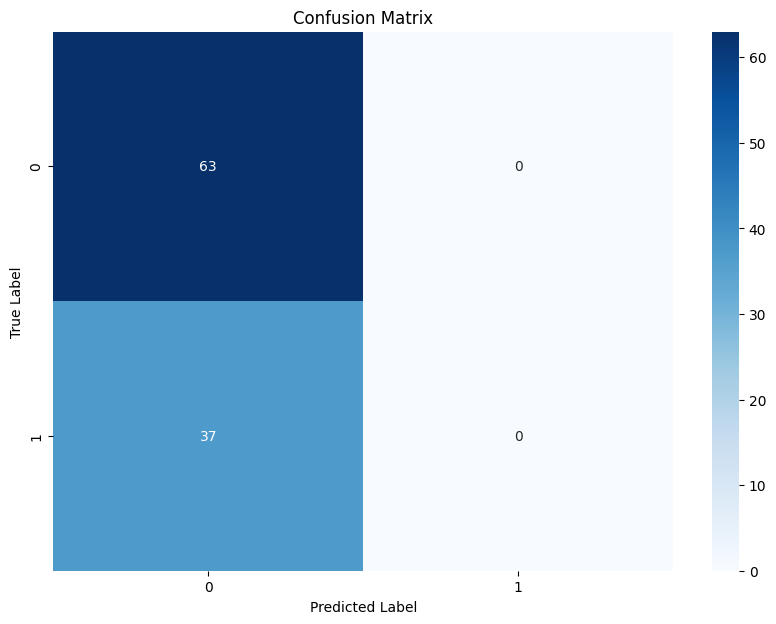

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        63
           1       0.00      0.00      0.00        37

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [54]:
sample_input_ = np.array([[1, 43.1708454101335,30.9456262795654, 25.9219712661024, 99]])
sample_input_df = pd.DataFrame(sample_input_)

In [55]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [59]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_anem = le.inverse_transform([predicted_class])
print(f"Hasil diagnosa pasien: {predicted_anem[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Hasil diagnosa pasien: No


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('anemia_diagnosis.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpscmr6moc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138896887800912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138896887802064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138896887800336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138896887798608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138896887802640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138896887798800: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [62]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']